# Example 3.4: GD training of a perceptron layer

In [1]:
import torch
import numpy as np
import matplotlib.pylab as plt

## Set the parameter for the layer and training

In [2]:
no_features = 3
no_labels = 2
no_data = 8

lr = 0.1
no_epochs = 10000

SEED = 10
np.random.seed(SEED)

## Generate training data

In [3]:
# generate training data
X = np.random.rand(no_data, no_features)
Y = np.zeros((no_data, no_labels))
Y[:,0] = (X[:,0] + X[:,1]**2 + X[:, 2]**3 + np.random.rand(no_data))/4
Y[:,1] = (X[:,0] + X[:,1] + X[:, 2] + X[:,0]*X[:,1]*X[:,2] + np.random.rand(no_data))/5

print('X = {}'.format(X))
print('Y = {}'.format(Y))
print('alpha = {}'.format(lr))

X = [[0.77132064 0.02075195 0.63364823]
 [0.74880388 0.49850701 0.22479665]
 [0.19806286 0.76053071 0.16911084]
 [0.08833981 0.68535982 0.95339335]
 [0.00394827 0.51219226 0.81262096]
 [0.61252607 0.72175532 0.29187607]
 [0.91777412 0.71457578 0.54254437]
 [0.14217005 0.37334076 0.67413362]]
Y = [[0.36700015 0.46890243]
 [0.36067172 0.37505132]
 [0.34976828 0.24872748]
 [0.48444787 0.41710316]
 [0.36332573 0.28887784]
 [0.43984029 0.51677508]
 [0.59832905 0.51552032]
 [0.27739117 0.37034263]]
alpha = 0.1


## Define the class for a perceptron layer

In [4]:
# a class for the preceptron layer
class Perceptron_Layer():
  def __init__(self, no_features, no_labels):
    self.w = torch.tensor(np.random.rand(no_features,no_labels)*0.05, dtype=torch.double)
    self.b = torch.zeros([no_labels], dtype=torch.double)

  def __call__(self, x):
    u = torch.matmul(torch.tensor(x), self.w) + self.b
    y = torch.sigmoid(u)
    return u, y

In [5]:
def loss_fn(predicted_y, target_y):
    return torch.mean(torch.square(predicted_y - torch.tensor(target_y)))

In [6]:
def train(model, inputs, outputs, learning_rate):
    _, y = model(inputs)
    dy = y*(1 - y)
    grad_u = -(torch.tensor(outputs) - y)*dy
    grad_w = torch.matmul(torch.transpose(torch.tensor(inputs), 0, 1), grad_u)
    grad_b = torch.sum(grad_u, dim = 0)
    
    model.w -= learning_rate * grad_w
    model.b -= learning_rate * grad_b
    
    return dy, grad_u, grad_w, grad_b

## Initialize the perceptron layer

In [7]:
model = Perceptron_Layer(no_features, no_labels)

print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))

w: [[0.02737931 0.04096435]
 [0.00994738 0.04284252]
 [0.01758263 0.03773238]], b: [0. 0.]


## Train the perceptron layer

In [8]:
cost = []
for epoch in range(no_epochs):
    u_, y_ = model(X)
    loss = loss_fn(y_, Y)
    dy_, grad_u_, grad_w_, grad_b_ = train(model, X, Y, lr)
    
    if (epoch < 2 or epoch == no_epochs - 1):
        print('epoch: {}'.format(epoch+1))
        print('u: {}'.format(u_))
        print('y: {}'.format(y_))
    
        print('m.s.e: {}'.format(loss))
          
        print('dy: {}'.format(dy_))
        print('grad_u: {}'.format(grad_u_))
        print('grad_w: {}'.format(grad_w_))
        print('grad_b: {}'.format(grad_b_))

        print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))
  
    cost.append(loss)

    if epoch%200 == 199:
        print('epoch:{}, loss:{}'.format(epoch+1,cost[epoch]))

epoch: 1
u: tensor([[0.0325, 0.0564],
        [0.0294, 0.0605],
        [0.0160, 0.0471],
        [0.0260, 0.0690],
        [0.0195, 0.0528],
        [0.0291, 0.0670],
        [0.0418, 0.0887],
        [0.0195, 0.0473]], dtype=torch.float64)
y: tensor([[0.5081, 0.5141],
        [0.5074, 0.5151],
        [0.5040, 0.5118],
        [0.5065, 0.5172],
        [0.5049, 0.5132],
        [0.5073, 0.5168],
        [0.5104, 0.5222],
        [0.5049, 0.5118]], dtype=torch.float64)
m.s.e: 0.020062590907154502
dy: tensor([[0.2499, 0.2498],
        [0.2499, 0.2498],
        [0.2500, 0.2499],
        [0.2500, 0.2497],
        [0.2500, 0.2498],
        [0.2499, 0.2497],
        [0.2499, 0.2495],
        [0.2500, 0.2499]], dtype=torch.float64)
grad_u: tensor([[ 3.5270e-02,  1.1289e-02],
        [ 3.6662e-02,  3.4986e-02],
        [ 3.8553e-02,  6.5724e-02],
        [ 5.5120e-03,  2.5002e-02],
        [ 3.5383e-02,  5.6039e-02],
        [ 1.6854e-02, -6.1615e-06],
        [-2.1962e-02,  1.6556e-03],
   

In [9]:
print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))
print('loss:{}'.format(cost[epoch]))

w: [[1.08203095 1.14034734]
 [1.42454337 0.39919455]
 [1.14653011 0.84453119]], b: [-2.24515506 -1.57582409]
loss:0.0014057076200629558


## Plot the learning curves

Text(0.5, 1.0, 'gd with alpha = 0.1')

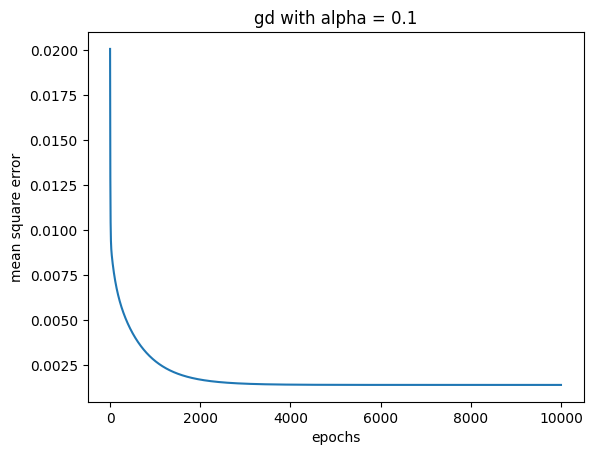

In [10]:
# plot learning curves
plt.figure(1)
plt.plot(range(no_epochs), cost)
plt.xlabel('epochs')
plt.ylabel('mean square error')
plt.title('gd with alpha = {}'.format(lr))

## Plot the training data and the predictions

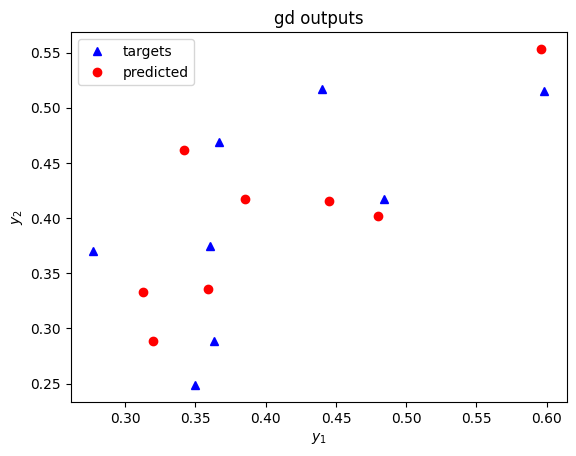

In [11]:
_, pred = model(X)

plt.figure(2)
plot_targets = plt.plot(Y[:,0], Y[:,1], 'b^', label='targets')
plot_pred = plt.plot(pred[:,0], pred[:,1], 'ro', label='predicted')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.title('gd outputs')
plt.legend()